# What is A/B Testing?

The purpose of A/B testing is to compare different content and design samples in pairs. However, this purpose may differ depending on the system in which we perform the test. In addition to being used mostly on applications, websites and advertisements, it is a test that can be applied in almost all decisions that can be taken thanks to the digital competencies we have. AB Testing outputs help us make accurate predictions. In summary, it can be said that they are experiments in which only one of more than one variable is changed and which variant performs better under equal conditions.

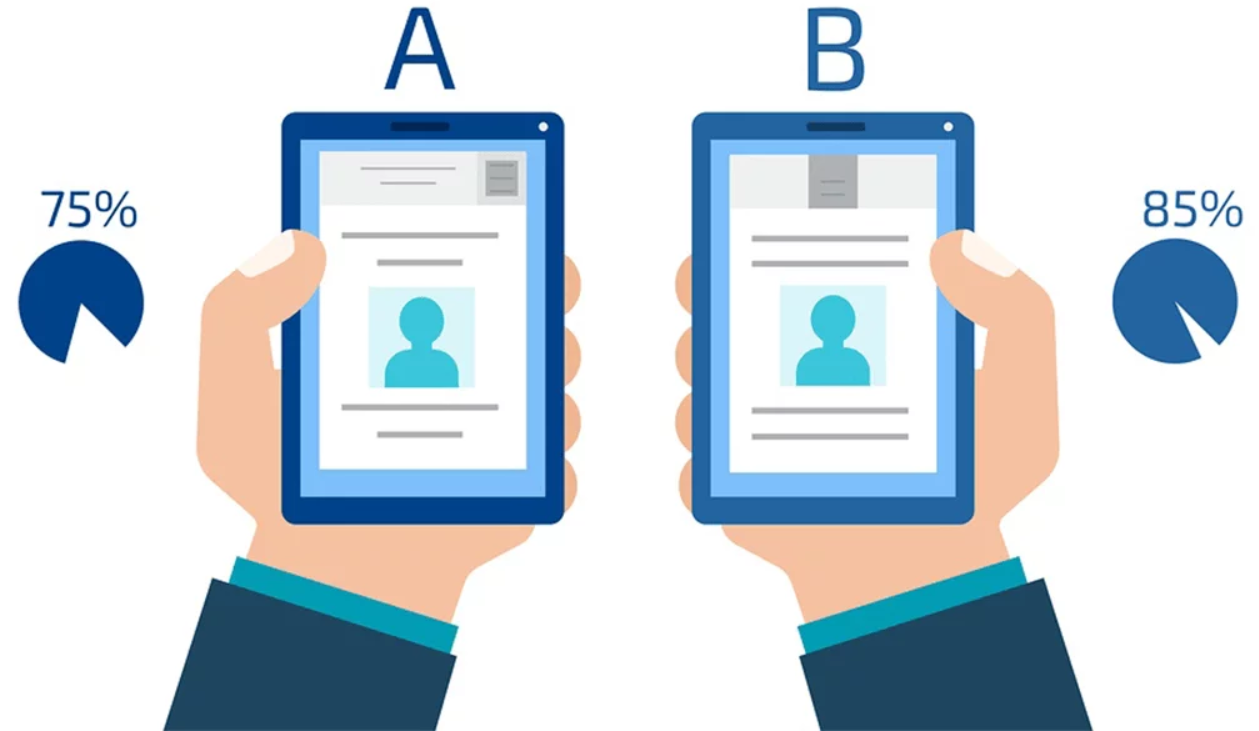

# How to Do A/B Testing?

First of all, a decision should be made about which variable A B test will be performed on. To go through a common example in digital marketing, let's talk about an experiment to be done on the CTA (Call-to-Action) text of an ad image. Let's assume that the current advertisement image says "Make an Appointment Now", and if we are wondering how it will perform, "Call Now". In the final stage, these two alternative texts should be evaluated under equal conditions.

*When doing A/B testing, there are some factors that you need to pay attention to in order to be able to do it in the most effective way.*

**Period**: Both versions should be tested at the same time. If version A is tested in September and version B is tested in November, we won't know if the results are different because of timing and not because of different elements.

**Randomness**: Test groups should be randomly and equally divided so that the results are unbiased.

**Time**: If the test is only done for a short time, the results may not be enough to make a decision.

The correct test method must be selected.
statistical hypotheses must be properly established and tested.


An example hypothesis to be established for the problem might be as follows:

H0: There is no statistically significant difference between the conversion rate value of the old system and the conversion rate value of the new system.

H1: There is a statistically significant difference between the conversion rate value of the old system and the conversion rate value of the new system.

# A/B Test Step by Step

Througout our testing process, we have a dataset containing data for 2 different designs (old_page vs new_page) of a private website page. The data set consists of **Impression**, **Click**, **Purchase**, **Earning** columns.

**Impression** – Number of ad views

**Click** – Specifies the number of clicks on the ad that appears.

**Purchase** – Specifies the number of products purchased after clicked ads.

**Earning** – Gain after purchased products

**Let's set up the hypothesis:**

H0: There is no statistically significant difference between Maximum Bidding and Average Bidding

H1: There is a statistically significant difference between Maximum Bidding and Average Bidding

In [1]:
import itertools
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.stats.api as sms
from scipy.stats import ttest_1samp, shapiro, levene, ttest_ind, mannwhitneyu, pearsonr, spearmanr, kendalltau, \
    f_oneway, kruskal
from statsmodels.stats.proportion import proportions_ztest

In [2]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 10)
pd.set_option('display.float_format', lambda x: '%.5f' % x)

Let's read the dataset. In order to test, we will need two groups, the **Control Group** and the **Test Group**.

CONTROL GROUP: We can read the data set of the control group as follows.

In [3]:
pip install openpyxl

     |████████████████████████████████| 242 kB 811 kB/s 
Note: you may need to restart the kernel to use updated packages.


In [4]:
df_control = pd.read_excel("../input/ab-testing/ab_testing.xlsx",sheet_name= "Control Group")
df_control.head()

,Impression,Click,Purchase,Earning
0,82529.45927,6090.07732,665.21125,2311.27714
1,98050.45193,3382.86179,315.08489,1742.80686
2,82696.02355,4167.96575,458.08374,1797.82745
3,109914.40040,4910.88224,487.09077,1696.22918
4,108457.76263,5987.65581,441.03405,1543.72018


For a first impression of our control group dataset, we can take a quick look.

In [5]:
df_control.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


TEST GROUP: After the control group, we read the data set of the test group as follows.

In [6]:
df_test = pd.read_excel("../input/ab-testing/ab_testing.xlsx",sheet_name= "Test Group")
df_test.head()

,Impression,Click,Purchase,Earning
0,120103.50380,3216.54796,702.16035,1939.61124
1,134775.94336,3635.08242,834.05429,2929.40582
2,107806.62079,3057.14356,422.93426,2526.24488
3,116445.27553,4650.47391,429.03353,2281.42857
4,145082.51684,5201.38772,749.86044,2781.69752


In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40 entries, 0 to 39
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Impression  40 non-null     float64
 1   Click       40 non-null     float64
 2   Purchase    40 non-null     float64
 3   Earning     40 non-null     float64
dtypes: float64(4)
memory usage: 1.4 KB


# Formulating a Hypothesis

1. Assumption is Normality
2. Assumption is Variance Homogenity

* If assumptions are provided then two independent sample t-tests (parametric testing) will be applied 

* If assumptions are not provided than Mannwhitneyu test (non-parametric test) will be applied




Therefore, we should first look at the assumption of normality.

We will perform hypothesis testing. It is necessary to interpret whether the results are statistically significant. Normality assumption check is considered as the first step of this test.

# Normality Assumption

It is possible to use various normality tests in order to reveal whether the data are suitable for normal distribution. The most well-known of these tests are Chi-Square, Kolmogorow-Smirnov, Lilliefors and Shapiro-Wilk normality tests. Among these, we will use the SHAPIRO WILK-W test.

# 1. Shapiro Wilk-W Test

Shapiro-Wilk and Kolmogorov-Smirnov are the most commonly used tests for the normal distribution test, and their hypotheses are basically the same. In contrast to other comparison tests the Shapiro-Wilk test is only applicable to check for normality. 

H0: The variable has a normal distribution. p-value > 0.05

H1: The variable does not have a normal distribution. p-value < 0.05

The null-hypothesis of this test is that the population is normally distributed. Thus, if the p value is less than the chosen alpha level, then the null hypothesis is rejected and there is evidence that the data tested are not normally distributed. On the other hand, if the p value is greater than the chosen alpha level, then the null hypothesis can not be rejected.

H0: Normal distribution assumption is provided.

H1: Normal distribution assumption is not provided.

In [8]:
df_control['Purchase'].mean()

550.8940587702316

In [9]:
df_test['Purchase'].mean()

582.1060966484675

In [10]:
test_stat, pvalue = shapiro(df_control["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

test_stat, pvalue = shapiro(df_test["Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 0.9773, p-value = 0.5891
Test Stat = 0.9589, p-value = 0.1541


H0 cannot be **rejected** for each group because p-value = 0.1541 and 0.5891 > 0.05, so that is, the normal distribution assumption of is provided. **H0 cannot be rejected.**

> Now that the variance of normality is satisfied, we should be able to control the homogeneity of the variance.

# Variance Homogenity Assumption

# 1. Levene's Test

**H0: Variances are Homogeneous.**

**H1: Variances are not Homogeneous.**


Levene's test is used to test the homogeneity of group variances. Levene test: It is run when groups are two or more. In other words, it is used in independent groups t test and Anova test. It is not used in the t test in dependent groups where the number of groups is odd. The sig (p) value found as a result of the Levene test is checked. If this value is greater than 0.05, we say that there is no difference. There is no difference between the groups. So we say the variances are equal (homogeneous). In this case, the values ​​in the first row (t value, p value) are taken into account. If equality of variances is not achieved, the values ​​in the second row (t value, p value) are taken into account. For example: p of the Levene test
Let the value be 0.949. Since this value is greater than 0.05, we say that the variances are equal (Equal variances assumed). And in the rest of the first line, we look at the values. Let the p value of the sample t test be found to be 0.123. If this value is less than/equal to p=0.05, the hypothesis is confirmed. Otherwise, it will not be validated. The equation in our example was: 0.123>0.05. In this case, our hypothesis was not confirmed. H0 accepted, H1 rejected.

In [11]:
test_stat, pvalue = levene(df_control['Purchase'],
                           df_test['Purchase'])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = 2.6393, p-value = 0.1083


H0 cannot be rejected because p-value = 0.1083 > 0.05, so that is, **homogeneous variance distribution is provided**.

We can apply Two Independent Sample T-Tests which is categorized as parametric test, since the assumptions are satisfied. 

# Independent Samples T Test

The independent sample t-test is used to test whether there is a statistically significant difference between two independent groups by looking at the means. This test is a parametric test and some assumptions (pre-requisites) must be fulfilled in order to report the results of the test.

We checked these necessary conditions in the previous step. Again, the dependent variable in each group should be normally distributed **(Normality)**. Variances should be homogeneous. **(Homogeneity)**

Apart from these two conditions, the following conditions must also be met:

* The dependent variable must be continuous.
* The argument must be categorical.
* The dataset should not contain outliers.


Note: The Independent Samples t Test can only compare the means for two (and only two) groups. It cannot make comparisons among more than two groups. If you wish to compare the means across more than two groups, you will likely want to run an ANOVA.

In [12]:
test_stat, pvalue = ttest_ind(df_control["Purchase"],
                              df_test["Purchase"],
                              equal_var=True)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = -0.9416, p-value = 0.3493


H0 cannot be rejected because p-value = 0.3493 > 0.05 . In other words, there is no statistically significant difference between the purchase averages of the control and test groups. There is no significant difference between maximum bidding and average bidding. 

# Mann–Whitney U test

It is a non-parametric method used to compare the means of two independent groups in a distribution that does not show normal distribution. Since this test is a non-parametric test, no assumptions are necessary regarding the distribution of the scores obtained.

A few necessary prerequisites for this test can be listed as follows:

* The independent variable must be categorical.
* The dependent variable must be continuous or sequential.
* The sample selected from the population should be random.
* The scores obtained from the groups should not show normal distribution.

# Functionalization of A/B Test

In [13]:
def hypothesis_checker(df_A, df_B, col_name):
    
    test_stat_A, pvalue_A = shapiro(df_A[col_name])
    test_stat_B, pvalue_B = shapiro(df_B[col_name])
    test_stat_var, pvalue_var = levene(df_A[col_name], df_B[col_name])
    
    print('*Normalization Check:')
    print('Shapiro Test for Control Group, Stat = %.4f, p-value = %.4f' % (test_stat_A, pvalue_A))
    print('Shapiro Test for Test Group, Stat = %.4f, p-value = %.4f' % (test_stat_B, pvalue_B))
    
    print('*Variance Check:')
    print('Levene Test Stat = %.4f, p-value = %.4f' % (test_stat_var, pvalue_var))
    
    if pvalue_A < 0.05 and pvalue_B < 0.05:
        test_stat, pvalue = mannwhitneyu(df_A[col_name], df_B[col_name])

        print(" ")
        print('Mann–Whitney U Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
        print(f'H0 hypothesis {"NOT REJECTED" if pvalue > 0.05 else "REJECTED"} in Mann–Whitney U Test')
        
    else:
        test_stat, pvalue = ttest_ind(df_A[col_name], df_B[col_name], equal_var=(True if pvalue_var > 0.05 else False))

        print(" ")
        print('Independent Samples T Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))
        print(f'H0 hypothesis {"NOT REJECTED" if pvalue > 0.05 else "REJECTED"}, Independent Samples T Test')

In [14]:
hypothesis_checker(df_control, df_test, 'Earning')

*Normalization Check:
Shapiro Test for Control Group, Stat = 0.9756, p-value = 0.5306
Shapiro Test for Test Group, Stat = 0.9780, p-value = 0.6163
*Variance Check:
Levene Test Stat = 0.3532, p-value = 0.5540
 
Independent Samples T Test Stat = -9.2545, p-value = 0.0000
H0 hypothesis REJECTED, Independent Samples T Test


The normality is provided beacuse P-value = 0.5306 and 0.6163 > 0.05 that is, H0 can not rejected.
The variance homogenity is provided beacuse P-value = 0.5540 > 0.05 that is, H0 can not rejected.
Due to the **normality** and **variance homogenity assumptions are provided**, we should perform Independent Samples T Test (parametric test).



As a result of Independent Samples T Test, there is a statistically significant difference between them because p-value = 0.0000 < 0.05 so H0 is rejected. Considering the gain in the test group, the test group earns more. That's why we should choose average bidding.

In [15]:
print('control_mean', df_control['Earning'].mean())
print('test_mean', df_test['Earning'].mean())

control_mean 1908.5682998027492
test_mean 2514.8907326506173


The presumability of normality is provided beacuse P-value = 0.5306 and 0.6163 > 0.05 that is, H0 can not rejected.
The presumability of variance homogenity is not provided beacuse P-value = 0.5540 > 0.05 that is, H0 can not rejected.


In this case, we should perform parametric testing.(Independent Samples T Test)


As a result, there is a statistically significant difference between them because p-value = 0.0000 < 0.05 so H0 is rejected. When you look at the gain in the test group, the test group gains more. That's why we can choose average bidding.

# Another Aspect - Conversion of Impression to Click

# Two Proportion Z-Test

**The Two-Proportions Z-Test is used to compare two ratios.**

Let's assume we have 2 groups of individuals: + Group 1, individuals with skin cancer: n = 100 + Group 2, healthy individuals: n = 100

Number of smokers in each group:


490 individuals from group 1 male: 98/100 = 98%

400 individuals from group 2 male: 80/100 = 80%
In total:


Percentage of male: 89%

Percentage of female: 11%

What we want to investigate is whether the proportion of gender in the two groups is the same.

H0: μ1 = μ2 (the two population proportions are equal) The alternative hypothesis can be either two-tailed, left-tailed, or right-tailed:

H0 : There is a statistically significant difference between the click rate averages of control and test groups.


H1 : There is no statistically significant difference between the click rate averages of control and test groups.

In [16]:
click_a = df_control["Click"].sum()
impression_a = df_control["Impression"].sum()
print(click_a/impression_a)

0.05014831092596444


In [17]:
click_b = df_test["Click"].sum()
impression_b = df_test["Impression"].sum()
print(click_b/impression_b)

0.032922333085396625


In [18]:
nclicks = np.array([click_a,click_b])

nad_views = np.array([impression_a,impression_b])

In [19]:
proportions_ztest(count=nclicks,nobs=nad_views)

(129.3304801715903, 0.0)

There is a statistically significant difference between them 

because p-value = 0.0000 < 0.05 so **H0 is rejected.**

Based on the current average click-through rates, 
* the maximum bidding 5 out of 100 people click on the ad, while 
* the ad the average bidding 3 out of 100 people click on.

So, if the company wants to increase the click-through rate, it may prefer maximum bidding.

# Conclusion

Running an A/B test that directly compares a variation to a current experience allows you to ask questions about changes to your website or app and then collect data on the impact of that change.

Based on the assumptions in website optimization, the test allows to make analyzes about business processes that can be called "we know" instead of "we think". By measuring the impact of changes on your metrics, you can get an idea of the consequences of each change.

To sum it up, let's review once again what you need to do the A/B test.

* Basic data should be collected

* Goals must be set

* Establish an assumption (estimate how a particular element might perform better)

* A variable must be created (a variable must be created to oppose the existing element based on the assumption)

* Run the test (must take into account time, means, etc. Be sure to test both versions (control and test) simultaneously to ensure validity of results

* Analyze the results – review the results to make sure the desired effect is achieved. Then choose which version performs better.

# References

[1] Shapiro, S. S., & Wilk, M. B. (1965). An analysis of variance test for normality (complete samples). Biometrika, 52(3/4), 591-611. 